In [1]:
import sys
import os
if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))
from src.generate import *

/home/nlonyuk/Desktop/nazar/thesis/tusp-pddl-generator/src/generate.py:177: SyntaxWarning: invalid escape sequence '\w'
  train_names = re.findall('train_\w+', move)
/home/nlonyuk/Desktop/nazar/thesis/tusp-pddl-generator/src/generate.py:178: SyntaxWarning: invalid escape sequence '\w'
  track_names = re.findall('track_\w+', move)


In [2]:
# binckhorst_yard = ShuntingYard(
#     "ins_n_bh", 
#     "dom_n",
#     DomainConfig.Numeric,
#     DirectionStrategy.Aside, # default direction Aside
#     True, # negative_preconditions
#     TrackOccupationStrategy.ORDER, # how to model where trains are
#     GoalStates.LOCATION, # how to model goalstates
#     0, # max concurrent movements
# )
# binckhorst_yard.load_location_json('../yards/location_kleine_binckhorst.json', include_switches=False)
# binckhorst_yard.load_train_json('../scenarios/scenario_pddl2.json')
# binckhorst_yard.remove_track('906c')
# binckhorst_yard.remove_track('906a')
# binckhorst_yard.remove_track('64')
# binckhorst_yard.remove_track('63')
# binckhorst_yard.set_entry_track_connections(['52', '53', '54', '55', '56', '57', '58', '59'], False)
# binckhorst_yard.set_servicing_tracks(['61', '62'])
# # binckhorst_yard.generate_instance()
# # binckhorst_yard.visualize(figsize=(12,8))

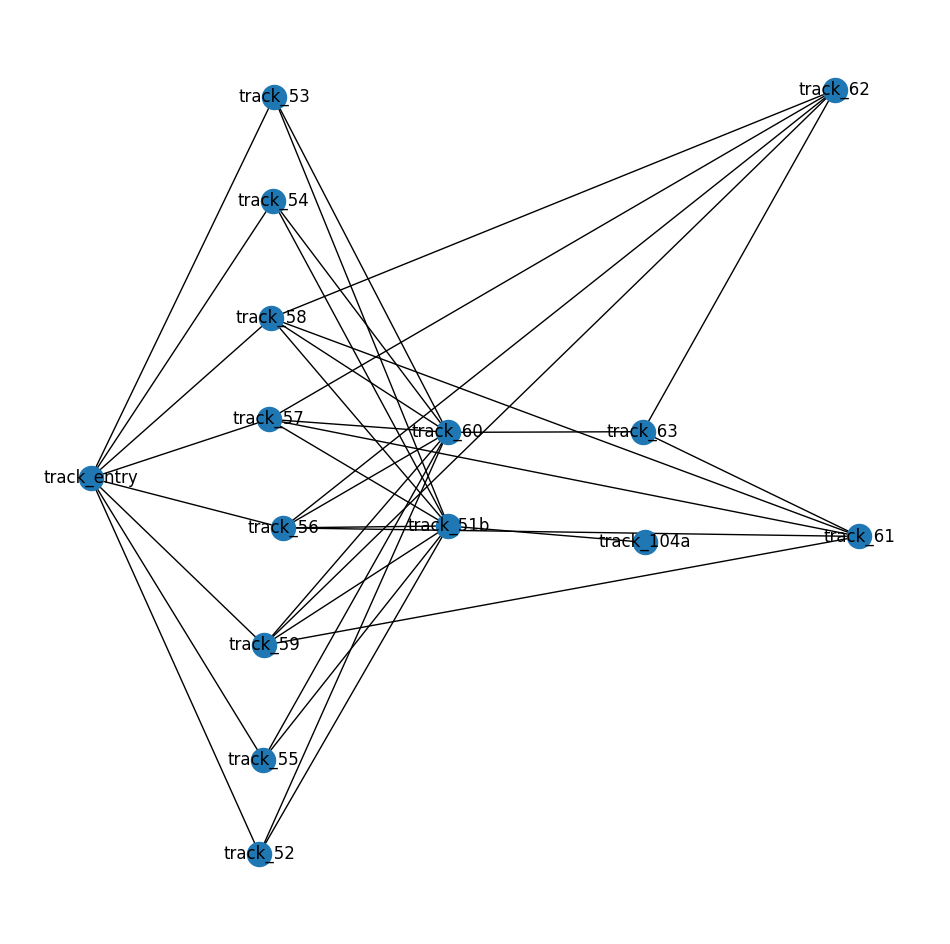

In [3]:
binckhorst_yard = ShuntingYard(
    "ins_n_bh", 
    "dom_n",
    DomainConfig.Numeric,
    DirectionStrategy.Aside, # default direction Aside
    True, # negative_preconditions
    TrackOccupationStrategy.ORDER, # how to model where trains are
    0, # max concurrent movements
)
binckhorst_yard.load_location_json('../yards/location_kleine_binckhorst.json', include_switches=False)
binckhorst_yard.remove_track('64')
binckhorst_yard.remove_track('906c')
binckhorst_yard.remove_track('906a')
binckhorst_yard.set_entry_track_connections(['52', '53', '54', '55', '56', '57', '58', '59'], False)
binckhorst_yard.load_train_json('../scenarios/scenario_pddl2.json')
binckhorst_yard.set_servicing_tracks(['61', '62', '63'])
# binckhorst_yard.load_state_from_plan('output.plan')
binckhorst_yard.generate_instance()
binckhorst_yard.visualize()
